In [1]:
import sys
import scanpy as sc
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mp
import cell2location as cl

mp.rcParams['pdf.fonttype'] = 42

Global seed set to 0
/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [ ]:
outdir = 'immune'
outdir_ref_sig = f'{outdir}/ref_signatures'
outdir_map = f'{outdir}/cell2location_map'

In [3]:
adata_ref = sc.read('../../scrna-seq/sce/immune_filtered.h5ad')
adata_ref

/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 18191 × 32283
    obs: 'Sample', 'Barcode', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'total', 'label', 'sizeFactor', 'scDblFinder.sample', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'label.ref.pred', 'label1', 'label.t.cell', 'label.mp.cell', 'label.neut.cell', 'label2'
    var: 'ID', 'Symbol', 'Type'
    uns: 'Samples', 'X_name'
    obsm: 'PCA', 'PCAsub', 'TSNE', 'TSNEsub', 'UMAP', 'UMAPsub'
    layers: 'logcounts'

In [42]:
dup_genes = adata_ref.var.index.duplicated()
idx = np.where(~dup_genes)[0]
adata_ref = adata_ref[:, idx].copy()

/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


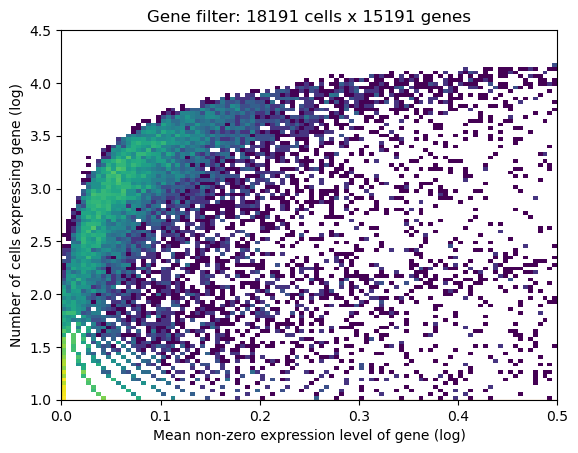

In [45]:
idx = cl.utils.filtering.filter_genes(adata_ref,
    cell_count_cutoff = 5,
    cell_percentage_cutoff2 = 0.03,
    nonz_mean_cutoff = 1
)

adata_ref = adata_ref[:, idx].copy()

In [47]:
adata_ref.obs

,Sample,Barcode,sum,detected,subsets_mito_sum,subsets_mito_detected,subsets_mito_percent,total,label,sizeFactor,...,scDblFinder.class,scDblFinder.score,scDblFinder.weighted,scDblFinder.cxds_score,label.ref.pred,label1,label.t.cell,label.mp.cell,label.neut.cell,label2
cell1,Prom1-DTA-IMM,AAACCTGAGCCACTAT-1,839.0,541,1.0,1,0.119190,839.0,1,0.196899,...,singlet,0.000022,0.061579,0.020485,Granulocytes,Neat1+ neutrophil,non-T cell,non-macrophage,non-neutrophil,Neat1+ neutrophil
cell2,Prom1-DTA-IMM,AAACCTGAGCGATTCT-1,2908.0,964,15.0,7,0.515818,2908.0,2,0.682457,...,singlet,0.091254,0.401501,0.087064,Granulocytes,neutrophil,non-T cell,non-macrophage,Gngt2- Cxcl2+ neutrophil,Gngt2- Cxcl2+ neutrophil
cell3,Prom1-DTA-IMM,AAACCTGAGCTATGCT-1,6372.0,2028,153.0,12,2.401130,6372.0,3,1.495396,...,singlet,0.000262,0.006023,0.021830,T cells,NK / T cell,Lef1+ Cd4+ T cell,non-macrophage,non-neutrophil,Lef1+ Cd4+ T cell
cell4,Prom1-DTA-IMM,AAACCTGAGCTTCGCG-1,3782.0,1498,81.0,10,2.141724,3782.0,5,0.887569,...,singlet,0.000227,0.092646,0.010907,B cells,B cell,non-T cell,non-macrophage,non-neutrophil,B cell
cell5,Prom1-DTA-IMM,AAACCTGAGGCATGGT-1,1821.0,904,4.0,3,0.219660,1821.0,1,0.427357,...,singlet,0.000095,0.072428,0.024266,Granulocytes,Neat1+ neutrophil,non-T cell,non-macrophage,non-neutrophil,Neat1+ neutrophil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell22060,Prom1-WT-IMM,TTTGTCATCCAAATGC-2,2603.0,1292,1.0,1,0.038417,2603.0,7,0.610878,...,singlet,0.023799,0.328335,0.084688,Granulocytes,neutrophil,non-T cell,non-macrophage,Gngt2+ Cxcl2+ neutrophil,Gngt2+ Cxcl2+ neutrophil
cell22061,Prom1-WT-IMM,TTTGTCATCCGTCAAA-2,1062.0,739,0.0,0,0.000000,1062.0,7,0.249233,...,singlet,0.000057,0.051603,0.053519,Granulocytes,neutrophil,non-T cell,non-macrophage,Gngt2+ Cxcl2+ neutrophil,Gngt2+ Cxcl2+ neutrophil
cell22062,Prom1-WT-IMM,TTTGTCATCCTAGTGA-2,1201.0,756,9.0,6,0.749376,1201.0,1,0.281854,...,singlet,0.000076,0.021920,0.019803,Granulocytes,Neat1+ neutrophil,non-T cell,non-macrophage,non-neutrophil,Neat1+ neutrophil
cell22063,Prom1-WT-IMM,TTTGTCATCGTTGACA-2,1734.0,872,2.0,1,0.115340,1734.0,8,0.406939,...,singlet,0.000184,0.090596,0.031976,Granulocytes,neutrophil,non-T cell,non-macrophage,Gngt2+ Cxcl2+ neutrophil,Gngt2+ Cxcl2+ neutrophil


In [48]:
cl.models.RegressionModel.setup_anndata(
    adata_ref,
    batch_key = 'Sample',
    labels_key = 'label2',
)

/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/scvi/data/_utils.py:114: UserWarning: Training will be faster when sparse matrix is formatted as CSR. It is safe to cast before model initialization.
  warnings.warn(


In [50]:
mod = cl.models.RegressionModel(adata_ref)
mod.view_anndata_setup()

Anndata setup with scvi-tools version 0.19.0.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'Sample',
│   'labels_key': 'label2',
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   2   │
│         n_cells          │ 18191 │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │  17   │
│          n_vars          │ 15191 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                    batch State Registry                     
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃  Categories   ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['Sample'] │ Prom1-DTA-IMM │          0          │
│                     │ Prom1-WT-IMM  │          1          │
└─────────────────────┴───────────────┴─────────────────────┘

                         labels State Registry                          
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃        Categories        ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['label2'] │         B1 cell          │          0          │
│                     │          B cell          │          1          │
│                     │    Capg+ Cd4+ T cell     │          2          │
│                     │  Cd74+ C1q+ macrophage   │          3          │
│                     │ Gngt2+ Cxcl2+ neutrophil │          4          │
│                     │ Gngt2+ Cxcl2- neutrophil │          5          │
│                     │ Gngt2- Cxcl2+ neutrophil │          6          │
│                     │    Gzmk+ Cd8+ T cell     │          7          │
│                     │       Il4+ NK cell       │          8          │
│                     │    Klra5+ Cd8+ T cell    │          9          │
│                     │    Lef1+ Cd4+ T cell     │         10          │
│                     │    Lef1+ Cd8+ T cell     │         11          │
│                     │  Mpeg1-high macrophage   │         12          │
│                     │      Ncr1+ NK cell       │         13          │
│                     │    Neat1+ neutrophil     │         14          │
│                     │  S100a6-high macrophage  │         15          │
│                     │        hepatocyte        │         16          │
└─────────────────────┴──────────────────────────┴─────────────────────┘

In [51]:
mod.train(max_epochs=1000, use_gpu=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:105: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/davids/local/miniconda3/envs/st/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (8) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 383/1000:  38%|███▊      | 382/1000 [15:04<24:37,  2.39s/it, v_num=1, elbo_train=7.7e+7] 

In [ ]:
mod.plot_history(20)

In [ ]:
adata_ref = mod.export_posterior(
    adata_ref,
    sample_kwargs = {'num_samples': 1000, 'batch_size': 2500, 'use_gpu': True}
)

mod.save(outdir_ref_sig, overwrite=True)
adata_ref.write(f'{outdir_ref_sig}/ref.h5ad')

In [ ]:
pl.axline((0, 0), slope=1, color='grey')
mod.plot_QC()

In [ ]:
adata_ref.uns['mod']

In [ ]:
inf_mean = adata_ref.varm['means_per_cluster_mu_fg'][
    [
        f'means_per_cluster_mu_fg_{i}'
        for i in adata_ref.uns['mod']['factor_names']
    ]
].copy()

inf_mean